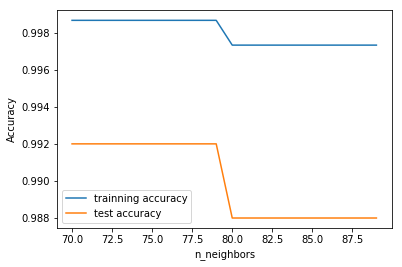

In [8]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import mglearn

##-------------load data method----------##
def load_dataframe(path):
    data_frame = pd.read_csv(path)
    return data_frame
##------------------------------##

normalized_length = []
normalized_protocol = []
target_list = []
neighbors_settings = range(1,10)
test_score = []
train_score = []
trainning_accuracy = []
test_accuracy = []


df = load_dataframe("sample.csv")
df.drop(['No.','Time','Source','Destination', 'Info'], axis=1, inplace = True) ##drop unnecessary features
##------------- Handle patterned texts---------##
encoder = LabelEncoder()
df_protocol = df['Protocol']
df['Protocol'] = encoder.fit_transform(df_protocol)
##--------------------------------------------##

for i in range(0,499):
    target_list.append(0)
for i in range(0,499):
    target_list.append(1)
    
target = np.array(target_list)

##-----------------Normalize Lenght--------------##
length = df['Length']
length_size = range(0,len(length))
length_max = length.max()
length_min = length.min()
denominator = length_max - length_min
for i in length_size:
    length.at[i] = length.at[i] + 0.0 
    normalized_length.append((length.at[i] - length_min) / (denominator))
df['Length'] = pd.DataFrame(normalized_length)
##-------------------------------##
##-----------------Normalize protocol--------------##
protocol = df['Protocol']
protocol_size = range(0,len(protocol))
protocol_max = protocol.max()
protocol_min = protocol.min()
denominator_p = protocol_max - protocol_min
for i in protocol_size:
    protocol.at[i] = protocol.at[i] + 0.0 
    normalized_protocol.append((protocol.at[i] - protocol_min) / (denominator_p))
df['Protocol'] = pd.DataFrame(normalized_protocol)    
##------------------------------------------------------##
#df.to_csv('normalized.csv')
x_train, x_test, y_train, y_test = train_test_split(df.values, target, stratify=target, random_state=66)
for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x_train, y_train)
    #record trainning set accuracy
    trainning_accuracy.append(knn.score(x_train, y_train))
    #record test set accuracy
    test_accuracy.append(knn.score(x_test, y_test))
    
plt.plot(neighbors_settings, trainning_accuracy, label="trainning accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('Normalized_train_test_accuracy_till_70 to 90_N.png')